## IMPORTING DATA FROM THE EXCEL SHEET AND ARRANGING IT INTO THE REQUIRED DATA STRUCTURES

In [25]:
import pandas as pd

#read in the excel sheet as a dataframe
file_path = 'testprefs.xlsx'
df = pd.read_excel(file_path)

#extract the list of profs 
prof_list = list(df.columns)

#create a dictionary mapping each prof to his workload
workload_dict  = dict()
for prof in prof_list:
    workload_dict[prof]=df.loc[0][prof]

#drop the workload row from each column
df.drop(0,axis=0,inplace=True)


num_profs = len(prof_list)

total_workload_capacity = 0
for workload in workload_dict.values():
    total_workload_capacity = total_workload_capacity + workload


#ug cdcs- y1=3, y2=4, y3=4
#hd cdcs- y1=2, y2=2
#ug and hd els- 2 each 
min_courses = 19







## CRASH TEST 1: TOTAL WORKLOAD CAPACITIES OF ALL PROFESSORS IS NOT ENOUGH TO TAKE CDCs + MINIMUM ELECTIVES

In [26]:
if(total_workload_capacity < min_courses):
    print("Given the number of professors and the workload each of them is willing to take, it is not possible to allot even the minimum number of courses.")

## CRASH TEST 2: INDIVIDUALLY CHECK EACH PROFESSORS PREFERENCE LIST TO SEE IF THE MINIMUM REQUIREMENTS HAVE BEEN COMPLIED WITH

In [27]:
# a professor must fill minimum 12 courses
# 4 fd cdcs, 4 fd els, 2 hd cdcs, 2 hd els
# if these conditions are not complied with, a crash is reported, because preferences were filled incorrectly.

for prof in prof_list:
    pref_list = [str for str in df[prof] if str == str]
    if(len(pref_list)<12):
        print(prof," has not filled the minimum 12 preferences")
    for course in pref_list:
        fdels = [pref for pref in pref_list if pref[0:5]=='fd_el']
        hdels = [pref for pref in pref_list if pref[0:5]=='hd_el']
        fdcdcs = [pref for pref in pref_list if pref[0:6]=='fd_cdc']
        hdcdcs = [pref for pref in pref_list if pref[0:6]=='hd_cdc']
    if(len(fdels)<4):
        print(prof," has not filled minimum 4 FD electives")
    if(len(hdels)<2):
        print(prof," has not filled minimum 2 HD electives")
    if(len(fdcdcs)<4):
        print(prof," has not filled minimum 4 FD CDCs")
    if(len(hdcdcs)<2):
        print(prof," has not filled minimum 2 HD CDCs")


    


prof2  has not filled minimum 4 FD CDCs
prof3  has not filled minimum 4 FD electives
prof4  has not filled minimum 4 FD electives
prof5  has not filled minimum 4 FD electives
prof6  has not filled minimum 2 HD electives
prof7  has not filled minimum 4 FD electives
prof8  has not filled minimum 4 FD electives
prof9  has not filled minimum 4 FD electives
prof10  has not filled minimum 2 HD electives
prof16  has not filled minimum 2 HD CDCs


## CRASH TEST 3: COLLECTIVELY CHECKING ALL PREFERENCES TO MAKE SURE CDCs AND A MINIMUM NUMBER OF ELECTIVES APPEAR AT LEAST ONCE

In [28]:
# we pool the unique courses from all the preferences of all professors and check that CDCs appear at least once. 
# if a CDC does not appear on even one professors preference list, it will go unallotted, which violates the given constraint.
# so, a crash is reported.

dumped_pref_list = []

for prof in prof_list:
    dumped_pref_list = dumped_pref_list + list(df[prof])
    
# remove all null values from the dumped preference list 
clean_dump = [str for str in dumped_pref_list if str == str]  

# convert to a set to store only unique values and remove duplicates
unique_prefs_list  = set(clean_dump)

num_unique_courses = len(unique_prefs_list) 

fd_el_count=0
hd_el_count=0
fd_cdc_y1_count=0
fd_cdc_y2_count=0
fd_cdc_y3_count=0
hd_cdc_y1_count=0
hd_cdc_y2_count=0


#take a count of each different category of courses 
for course in unique_prefs_list:
    if(course[0:5]=='fd_el'):
        fd_el_count +=1
    elif(course[0:5]=='hd_el'):
        hd_el_count +=1
    elif(course[0:6]=='fd_cdc'):
        if(course[8] == '1'):
            fd_cdc_y1_count+=1
        elif(course[8] == '2'):
            fd_cdc_y2_count+=1
        elif(course[8] == '3'):
            fd_cdc_y3_count+=1
    elif(course[0:6]=='hd_cdc'):
        if(course[8] == '1'):
            hd_cdc_y1_count+=1
        elif(course[8] == '2'):
            hd_cdc_y2_count+=1
            

#check if the minimum requirements are satisfied, print appropriate crash message if not.
            
if(fd_cdc_y1_count<3 or fd_cdc_y2_count<4 or fd_cdc_y3_count<4):
    print("FD CDC allotment not possible, not enough professors have filled FD CDC as preferences")

if(hd_cdc_y1_count<2 or hd_cdc_y2_count<2):
    print("HD CDC allotment not possible, not enough professors have filled HD CDC as preferences")

if(fd_el_count<2):
    print("cannot offer the minimum required 2 FD Electives, not enough professors have filled FD electives as preferences")
 
if(hd_el_count<2):
    print("cannot offer the minimum required 2 HD Electives, not enough professors have filled HD electives as preferences")

            
  

        



    


        



## CRASH TEST 4: CHECK FOR UNIQUE COURSES (THAT HAVE BEEN FILLED BY ONLY ONE PROF)


In [29]:
# we define a unique course as a course that appears on only one professors preference list.
# electives may be unique, because there is no compulsion to offer them (apart from the minimum number)
# if CDCs are unique to a particular prof, this may pose problems during allotment, so we must perform certain checks to make sure the allotment is possible
# if a CDC is unique to an x1 type professor, it will not be possible to allot the full course, so a crash is reported.
# a CDC may be unique to an x2 or x3 type professor, as they can simply be allotted the whole course to teach themselves.
# however, not more than one CDC can be unique to a particular professor, because even if they have a capacity of 1 or 1.5,
# it is not possibee to entirely allot them both/all the courses unique to them. so, a crash is reported in this case.


dumped_pref_list = []

for prof in prof_list:
    dumped_pref_list = dumped_pref_list + list(df[prof])
    
# remove all null values from the dumped preference list 
clean_dump = [str for str in dumped_pref_list if str == str] 

#remove all electives
cdc_dump = [course for course in clean_dump if course[3:6]=='cdc']
count = pd.Series(cdc_dump).value_counts()

#count number of occurences of each cdc
count_dict = count.to_dict()

#store the ones which appear only once
unique_list = [course for course,freq in count_dict.items() if count_dict[course]==1]


#map in the main dataframe which courses are unique
mask = df.isin(unique_list)

#iterate through the list of professors to see which professors have filled the unique courses
for prof in prof_list:
    if(workload_dict[prof]==0.5): #for x1 type prof, even one unique course is not permissible 
        if(mask[prof].value_counts()[False]<len(mask[prof])):
            print("the following CDC(s) have been filled only by an x1 type professor, so it is not possible to allot them")
            templist = list(course for course in df[prof] if course in unique_list)
            print(templist)
    if(workload_dict[prof]>0.5): # for an x2 or x3 type prof, at most one unique course is permissible
        if(mask[prof].value_counts()[False]<(len(mask[prof])-1)):
            print("the following CDCs have been filled by only one prof, so it is not possible to offer both/all of them")
            templist = list(course for course in df[prof] if course in unique_list)
            print(templist)
        

## MAKING ADJUSTMENTS TO THE COURSE LIST AND PROFESSOR WORKLOAD SO THAT NECESSARY CONSTRAINTS MAY BE SATISFIED AFTER AN OPTIMIZATION ALGORITHM IS APPLIED

In [30]:
# the program uses an edge weight maximization algorithm to find optimal course allotment
# the algorithm inputs a bipartite graph with weighted edges, and deletes extra edges to maximize total edge weight,
# while simultaneously resepecting vertex constraints (based on professor workload).
# the graph which is inputted to the algorithm must be constructed in such a way that all the courses present in it definitely 
# get allotted, and all professors are allotted courses such that their workload capacity is exactly satisfied.

# so, if the total workload capacity is above the minimum number of courses that must be offered, we select electives 
# to equate the number of courses with the professor workload.

# also, if the total workload is not a whole number, there will definitely be one professor working 0.5 units below capacity.

whole = total_workload_capacity.is_integer()

for prof,load in workload_dict.items():
    if(load == 1.5):
        minprefprof = prof
        break

# if workload is not a whole number, choose the x3 type prof with the least number of preferences filled,
# and reduce his course load from 1.5 to 1
if (whole == False):
    for prof,load in workload_dict.items():
        if(len([entry for entry in df[prof] if entry == entry]) <=len([entry for entry in df[minprefprof] if entry == entry]) and load==1.5):
            minprefprof = prof
    
    workload_dict[minprefprof] = 1
    total_workload_capacity -=0.5
    
    print(workload_dict.items())
    print(total_workload_capacity)
    
    

    

    
        
        


dict_items([('prof1', 0.5), ('prof2', 0.5), ('prof3', 1), ('prof4', 1), ('prof5', 1), ('prof6', 1), ('prof7', 1), ('prof8', 1), ('prof9', 1), ('prof10', 1), ('prof11', 1.5), ('prof12', 1.5), ('prof13', 1), ('prof14', 1.5), ('prof15', 1.5), ('prof16', 1.5), ('prof17', 1.5), ('prof18', 1.5), ('prof19', 1.5)])
22.0


## FINALIZING THE COURSE LIST WITH CDCs AND THE REQUIRED ELECTIVES TO COMPLETE ALL PROFS WORKLOADS.

In [31]:
dumped_pref_list = []


for prof in prof_list:
    dumped_pref_list = dumped_pref_list + list(df[prof])

# remove all null values from the dumped preference list 
clean_dump = [str for str in dumped_pref_list if str == str] 

#remove all electives
cdc_dump = [course for course in clean_dump if course[3:6]=='cdc']

final_courselist = list(set(cdc_dump))

#additional electives required above the minimum 4 to equate workload with course number
req_add_el = total_workload_capacity - min_courses

for prof in prof_list:
    dumped_pref_list = dumped_pref_list + list(df[prof])
    


    
# remove all null values from the dumped preference list 
clean_dump = [str for str in dumped_pref_list if str == str]  
fd_el_dump = [course for course in clean_dump if course[0:5]=='fd_el']
hd_el_dump = [course for course in clean_dump if course[0:5]=='hd_el']

# create a dictionary with every elective and its frequency of occurence
fdel_dict = pd.Series(fd_el_dump).value_counts().to_dict()
hdel_dict = pd.Series(hd_el_dump).value_counts().to_dict()


# add the minimum required 2 fd and 2 hd els to the final course list 
final_courselist = final_courselist + list(hdel_dict)[0:2] + list(fdel_dict)[0:2]
                                                                            
if(req_add_el>0):
    final_courselist = final_courselist + list(fdel_dict)[2:(2+int(req_add_el))]

sorted(final_courselist)


['fd_cdc_y1_1',
 'fd_cdc_y1_2',
 'fd_cdc_y1_3',
 'fd_cdc_y2_1',
 'fd_cdc_y2_2',
 'fd_cdc_y2_3',
 'fd_cdc_y2_4',
 'fd_cdc_y3_1',
 'fd_cdc_y3_2',
 'fd_cdc_y3_3',
 'fd_cdc_y3_4',
 'fd_el_1',
 'fd_el_2',
 'fd_el_4',
 'fd_el_5',
 'fd_el_8',
 'hd_cdc_y1_1',
 'hd_cdc_y1_2',
 'hd_cdc_y2_1',
 'hd_cdc_y2_2',
 'hd_el_1',
 'hd_el_7']

## CREATING A BIPARTITE GRAPH OF PROFESSOR AND COURSE NODES

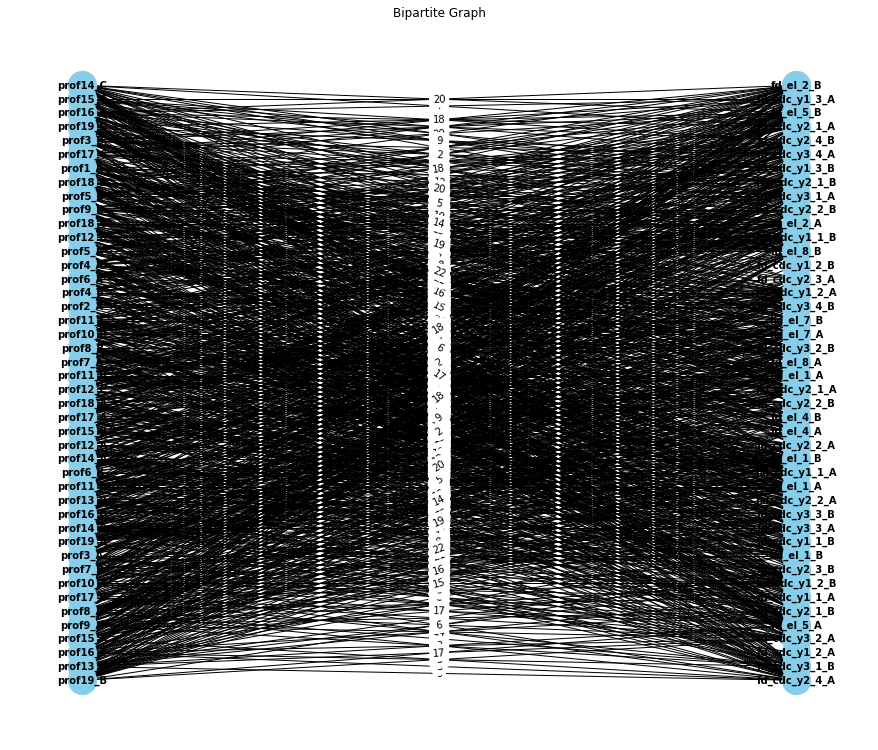

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

prof_node_list = []
for prof in prof_list:
    if (workload_dict[prof] >= 0.5):
        prof_node_list.append(prof+'_A')
    if (workload_dict[prof] >= 1):
        prof_node_list.append(prof+'_B')
    if (workload_dict[prof] >= 1.5):
        prof_node_list.append(prof+'_C')
        
course_node_list = []
for course in final_courselist:
    course_node_list.append(course+'_A')
    course_node_list.append(course+'_B')
                              

plt.figure(figsize=(12,10))
# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph, specifying their bipartite attribute
G.add_nodes_from(prof_node_list, bipartite=0)  # Set bipartite attribute to 0 for the first set
G.add_nodes_from(course_node_list, bipartite=1)  # Set bipartite attribute to 1 for the second set

           
for prof_node in prof_node_list:
    prof = prof_node.split('_')[0]
    preflist = [course for course in df[prof] if course == course]
    weightfactor = 1
    for course_node in course_node_list:
        if(course_node[3:6]=='cdc'):
            course = course_node[0:11]
        if(course_node[3:5]=='el'):
            course = course_node[0:7]
        if(course in preflist):
            G.add_edge(prof_node,course_node,weight=weightfactor)
            weightfactor += 1
            

    
# Visualize the bipartite graph
pos = nx.bipartite_layout(G, prof_node_list)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='black', font_color='black', font_size=10, node_size=800)


edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Bipartite Graph")
plt.show()

            


## APPLYING THE MINIMUM WEIGHT MATCHING ALGORITHM TO THE BIPARTITE GRAPH

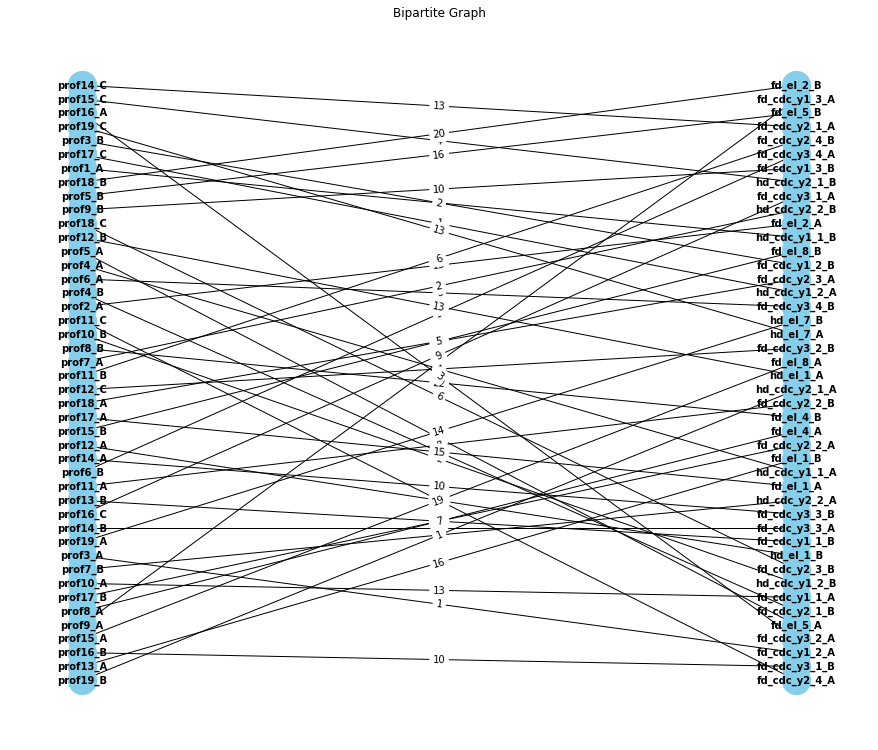

In [40]:
from networkx.algorithms import bipartite

plt.figure(figsize=(12,10))
matching = nx.bipartite.minimum_weight_full_matching(G,prof_node_list, weight='weight')



matching_edges_list = [(k, v) for k, v in matching.items()]
matching_edges = set(matching_edges_list)
matching_edges

# Create a graph with only the edges in the matching
M = G.edge_subgraph(matching_edges)
    
# Visualize the bipartite graph
pos = nx.bipartite_layout(M, prof_node_list)
nx.draw(M, pos, with_labels=True, font_weight='bold', node_color='skyblue', edge_color='black', font_color='black', font_size=10, node_size=800)


edge_labels = {(u, v): d['weight'] for u, v, d in M.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Bipartite Graph")
plt.show()

            


In [41]:
max_edge_dict= dict()
for edge in list(matching_edges):
    max_edge_dict[sorted(list(edge))[0]]=sorted(list(edge))[1]
    
sort_final_courselist = sorted(final_courselist)

allotment_dict = dict()

for course in sort_final_courselist:
    faculty = []
    for coursenode,profnode in max_edge_dict.items():
        if(course == coursenode[0:len(course)]):
            if(profnode.split('_')[0] not in faculty):
                faculty.append(profnode.split('_')[0])
    allotment_dict[course]=faculty

allotment_dict

allotment_data = pd.DataFrame({'COURSE':allotment_dict.keys(), 'FACULTY ALLOTTED':allotment_dict.values()})

allotment_data.to_excel('faculty course allotment 1.xlsx',sheet_name='FINAL ALLOTMENTS')
allotment_data

            


,COURSE,FACULTY ALLOTTED
0,fd_cdc_y1_1,"[prof10, prof13]"
1,fd_cdc_y1_2,[prof3]
2,fd_cdc_y1_3,[prof9]
3,fd_cdc_y2_1,"[prof4, prof14]"
4,fd_cdc_y2_2,"[prof11, prof17]"
5,fd_cdc_y2_3,[prof18]
6,fd_cdc_y2_4,[prof11]
7,fd_cdc_y3_1,[prof16]
8,fd_cdc_y3_2,"[prof16, prof12]"
9,fd_cdc_y3_3,[prof14]


## OBTAINING AN ALTERNATE ALLOTMENT BY WEIGHTING CDCs AND ELECTIVES DIFFERENTLY

In [43]:
# in the above code, the CDCs and elective edges are assigned weights in the graph impartially,
# based simply on where they appear in the professors preference list
# however, if we wish to prioritize the allotment of CDCs over electives, we can change the way weights are assigned
# Here, CDCs are weighted the same way as before, but the weight of an edge is multiplied by an arbitrary number (say 2),
# so that it is at a lower priority relative to CDCs when plugged into a weight minimization algorithm.

prof_node_list = []
for prof in prof_list:
    if (workload_dict[prof] >= 0.5):
        prof_node_list.append(prof+'_A')
    if (workload_dict[prof] >= 1):
        prof_node_list.append(prof+'_B')
    if (workload_dict[prof] >= 1.5):
        prof_node_list.append(prof+'_C')
        
course_node_list = []
for course in final_courselist:
    course_node_list.append(course+'_A')
    course_node_list.append(course+'_B')
                              

plt.figure(figsize=(12,10))
# Create a bipartite graph
G = nx.Graph()

# Add nodes to the graph, specifying their bipartite attribute
G.add_nodes_from(prof_node_list, bipartite=0)  # Set bipartite attribute to 0 for the first set
G.add_nodes_from(course_node_list, bipartite=1)  # Set bipartite attribute to 1 for the second set

for prof_node in prof_node_list:
    prof = prof_node.split('_')[0]
    preflist = [course for course in df[prof] if course == course]
    #weightfactor = 1
    for course_node in course_node_list:
        if(course_node[3:6]=='cdc'):
            course = course_node[0:11]
        if(course_node[3:5]=='el'):
            course = course_node[0:7]
        if(course in preflist):
            weightfactor = (preflist.index(course)+1)
            if(course[3:5]=='el'):
                weightfactor = weightfactor *2
            G.add_edge(prof_node,course_node,weight=weightfactor)
            weightfactor += 1
            
from networkx.algorithms import bipartite

matching = nx.bipartite.minimum_weight_full_matching(G,prof_node_list, weight='weight')

matching_edges_list = [(k, v) for k, v in matching.items()]
matching_edges = set(matching_edges_list)

max_edge_dict= dict()
for edge in list(matching_edges):
    max_edge_dict[sorted(list(edge))[0]]=sorted(list(edge))[1]
    
sort_final_courselist = sorted(final_courselist)

allotment_dict = dict()

for course in sort_final_courselist:
    faculty = []
    for coursenode,profnode in max_edge_dict.items():
        if(course == coursenode[0:len(course)]):
            if(profnode.split('_')[0] not in faculty):
                faculty.append(profnode.split('_')[0])
    allotment_dict[course]=faculty

allotment_dict

allotment_data = pd.DataFrame({'COURSE':allotment_dict.keys(), 'FACULTY ALLOTTED':allotment_dict.values()})

allotment_data.to_excel('faculty course allotment 2.xlsx',sheet_name=' ALT FINAL ALLOTMENTS')
allotment_data

    


,COURSE,FACULTY ALLOTTED
0,fd_cdc_y1_1,"[prof18, prof13]"
1,fd_cdc_y1_2,[prof3]
2,fd_cdc_y1_3,[prof5]
3,fd_cdc_y2_1,[prof6]
4,fd_cdc_y2_2,[prof15]
5,fd_cdc_y2_3,"[prof2, prof14]"
6,fd_cdc_y2_4,"[prof8, prof16]"
7,fd_cdc_y3_1,"[prof11, prof9]"
8,fd_cdc_y3_2,[prof7]
9,fd_cdc_y3_3,[prof14]


<Figure size 864x720 with 0 Axes>